In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import load_model
from tensorflow import keras
import warnings
import pickle
warnings.filterwarnings("ignore")

In [164]:
# pickle_in = open("../Data_error/error_flatten.pickle","rb")
# data diload sudah dalam bentuk 1D
# X = pickle.load(pickle_in)
# untuk menampilkan gambar data 1D -> 2D
# plt.imshow(X[0].reshape(83,114))

In [165]:
# X

In [166]:
# np.array(X).shape[0]/12

In [167]:
# df = X
# data_1 = df[:-48]
# data_2 = df[:-36]
# data_3 = df[:-24]
# data_4 = df[:-12]
# data_5 = df
# # data tahun 1983-2011
# df=df[:-60]

In [168]:
# train -> data 1983-2011
# train, test = df[-240:], df[-12:]

In [169]:
# np.array(train).shape[0]/12

In [170]:
# scaler = MinMaxScaler()
# scaler.fit(train)
# scaler.fit(data_4)
# scaler.fit(test)
# train = scaler.transform(train)
# data_4 = scaler.transform(data_4)
# test = scaler.transform(test)

In [171]:
# n_input = 12
# n_features = 9462
# batch_size=12
# supervised data
# generator = TimeseriesGenerator(train, train, length=n_input, batch_size=batch_size)
# validation_sequence = TimeseriesGenerator(test, test, length=n_input, batch_size=batch_size)

In [172]:
# Load Model

model = keras.models.load_model('LSTM102030DENSE405060_adam_seed1.h5')

In [173]:
pred_list = []

batch = train[-12:].reshape((1, n_input, n_features))
batch

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [174]:
for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

pred_list = scaler.inverse_transform(pred_list)

# prediksi = (model.predict(batch)[0])

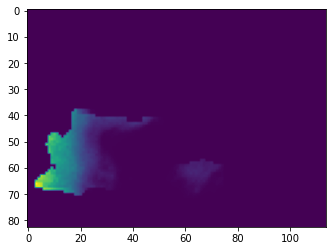

In [175]:
plt.imshow(pred_list[0].reshape(83,114))

In [176]:
train = df
test = df[-24:]

In [177]:
scaler.fit(train)
train = scaler.transform(train)
scaler.fit(test)
test = scaler.transform(test)

In [178]:
n_input = 12
n_features = 9462
# generator = TimeseriesGenerator(train, train, length=n_input, batch_size=12)
# validation_sequence = TimeseriesGenerator(test, test, length=n_input, batch_size=12)

In [179]:
pred_list = []

batch = data_4[-60:-48].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
batch1 = data_4[-48:-36].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch1)[0]) 
    batch1 = np.append(batch1[:,1:,:],[[pred_list[i]]],axis=1)
    
batch2 = data_4[-36:-24].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch2)[0]) 
    batch2 = np.append(batch2[:,1:,:],[[pred_list[i]]],axis=1)
    
# data tahun 2014 untuk memprediksi tahun 2015
batch3 = data_4[-24:-12].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch3)[0]) 
    batch3 = np.append(batch3[:,1:,:],[[pred_list[i]]],axis=1)

# data tahun 2015 untuk memprediksi tahun 2016
batch4 = data_4[-12:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch4)[0]) 
    batch4 = np.append(batch4[:,1:,:],[[pred_list[i]]],axis=1)

In [180]:
batch

array([[[2.38657431e-05, 2.40466597e-05, 2.46126219e-05, ...,
         2.38037592e-05, 2.43020950e-05, 2.51222846e-05],
        [2.38657431e-05, 2.40466597e-05, 2.46126219e-05, ...,
         2.38037592e-05, 2.43020950e-05, 2.51222846e-05],
        [2.38657431e-05, 2.40466597e-05, 2.46126219e-05, ...,
         2.38037592e-05, 2.43020950e-05, 2.51222846e-05],
        ...,
        [2.44438306e-05, 2.46258878e-05, 2.52049085e-05, ...,
         2.43812283e-05, 2.48860306e-05, 2.57276188e-05],
        [2.44412695e-05, 2.46233067e-05, 2.52022637e-05, ...,
         2.43786253e-05, 2.48833949e-05, 2.57249958e-05],
        [2.44213243e-05, 2.46033524e-05, 2.51818437e-05, ...,
         2.43587092e-05, 2.48633514e-05, 2.57040756e-05]]])

In [181]:
pred_list = scaler.inverse_transform(pred_list)
pred_list

array([[2.38657431e-05, 2.40466597e-05, 2.46126219e-05, ...,
        2.38037592e-05, 2.43020950e-05, 2.51222846e-05],
       [2.38657431e-05, 2.40466597e-05, 2.46126219e-05, ...,
        2.38037592e-05, 2.43020950e-05, 2.51222846e-05],
       [2.38657431e-05, 2.40466597e-05, 2.46126219e-05, ...,
        2.38037592e-05, 2.43020950e-05, 2.51222846e-05],
       ...,
       [2.38313114e-05, 2.40121262e-05, 2.45772990e-05, ...,
        2.37693475e-05, 2.42673104e-05, 2.50862067e-05],
       [2.38337871e-05, 2.40147820e-05, 2.45800202e-05, ...,
        2.37719778e-05, 2.42699261e-05, 2.50889589e-05],
       [2.38444736e-05, 2.40253648e-05, 2.45908504e-05, ...,
        2.37825207e-05, 2.42806200e-05, 2.51001111e-05]])

In [182]:
pred_list.shape

(60, 9462)

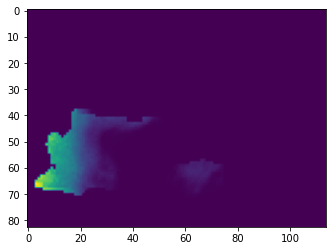

In [183]:
plt.imshow(pred_list[59].reshape(83,114))

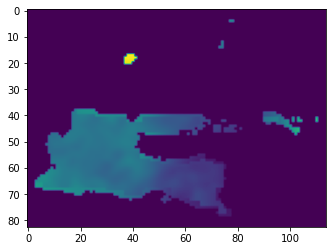

In [184]:
df_asli = X[-60:]
plt.imshow(df_asli[0].reshape(83,114))

In [185]:
max(pred_list[10])

0.10648247520086418

In [186]:
max(df_asli[10])

0.0

In [187]:
# SAE untuk semua data
pred_list[pred_list<0]=0
pred_list_new=[]
df_asli_new=[]
no=0
# df_asli=np.array(df_asli)
# for pred in pred_list:
#     pred_list_new.append(list(filter(lambda x: x != 0, pred_list[no])))
#     df_asli_new.append(list(filter(lambda x: x != 0, df_asli[no])))
#     no+=1
    
pred_list_new=np.array(pred_list_new)
df_asli_new=np.array(df_asli_new)

# pred_list.shape
# np.array(df_asli_new).shape

sae=[]
no=0

for pred1 in pred_list:
    sae_ = df_asli[no]-pred1
    sae_ = np.abs(sae_)
    sae.append(sae_)
    no+=1

In [188]:
sae

[array([2.38657431e-05, 2.40466597e-05, 2.46126219e-05, ...,
        2.38037592e-05, 2.43020950e-05, 2.51222846e-05]),
 array([2.38657431e-05, 2.40466597e-05, 2.46126219e-05, ...,
        2.38037592e-05, 2.43020950e-05, 2.51222846e-05]),
 array([2.38657431e-05, 2.40466597e-05, 2.46126219e-05, ...,
        2.38037592e-05, 2.43020950e-05, 2.51222846e-05]),
 array([2.38331977e-05, 2.40140271e-05, 2.45792453e-05, ...,
        2.37712975e-05, 2.42692076e-05, 2.50881694e-05]),
 array([2.38651064e-05, 2.40459485e-05, 2.46119907e-05, ...,
        2.38031007e-05, 2.43014456e-05, 2.51216134e-05]),
 array([2.38657431e-05, 2.40466597e-05, 2.46126219e-05, ...,
        2.38037592e-05, 2.43020950e-05, 2.51222846e-05]),
 array([2.38657431e-05, 2.40466597e-05, 2.46126219e-05, ...,
        2.38037592e-05, 2.43020950e-05, 2.51222846e-05]),
 array([2.38657431e-05, 2.40466597e-05, 2.46126219e-05, ...,
        2.38037592e-05, 2.43020950e-05, 2.51222846e-05]),
 array([2.38657431e-05, 2.40466597e-05, 2.461262

In [189]:
sae_ = sum(sae)/60
sae_ = np.sum(sae_)
sae_

194.33549203517438

In [190]:
# MAE untuk semua data
pred_list[pred_list<0]=0
pred_list_new=[]
df_asli_new=[]
no=0
predi_list=np.array(pred_list)
df_asli=np.array(df_asli)
# for pred in pred_list:
#     pred_list_new.append(list(filter(lambda x: x != 0, pred_list[no])))
#     df_asli_new.append(list(filter(lambda x: x != 0, df_asli[no])))
#     no+=1
    
pred_list_new=np.array(pred_list_new)
df_asli_new=np.array(df_asli_new)

# pred_list.shape
# np.array(df_asli_new).shape

mae=[]
no=0
# for pred1 in pred_list:
#     mae_ = df_asli[no]-pred1
#     mae_ = np.average(mae_)
#     mae.append(mae_)
#     no+=1
    
from sklearn.metrics import mean_absolute_error
for pred1 in pred_list:
    mae_ = mean_absolute_error(df_asli[no], pred1)
    mae.append(mae_)
    no+=1

In [191]:
mae

[0.04795094098521717,
 0.02699053684561619,
 0.05320167082442785,
 0.0024482726563611647,
 0.0024492245836636997,
 0.001955676474962106,
 0.0033239583388098622,
 0.020769653768921637,
 0.07241897672491164,
 0.004227526801103248,
 0.0024662495143881777,
 0.0024664730496270766,
 0.06677853861968912,
 0.04237460607012713,
 0.06610139522011219,
 0.002448068542527308,
 0.002449199621069729,
 0.0013935547581937703,
 0.003685908004299719,
 0.02452977074204754,
 0.07140269072524467,
 0.003534560005842934,
 0.0024662492810703786,
 0.002465664929195387,
 0.041261784446712094,
 0.016568363564986494,
 0.03919144192344172,
 0.0024481001435405223,
 0.0024492027924820294,
 0.0020327970182281137,
 0.004315279857130971,
 0.017858866860307493,
 0.07237933341207527,
 0.0036367899317135623,
 0.0024662495143881777,
 0.0024731847644899317,
 0.0025419599539599574,
 0.0024492434519973443,
 0.0024492434519973443,
 0.002448059050734582,
 0.0024491954080213068,
 0.0024492413993354944,
 0.009663337703300096,
 0.0

In [192]:
sum(mae)/60

0.020538521669327247

In [132]:
# pred_list_new

Pred_rata= []
for i in range(0,60):
	Pred_rata.append((pred_list[i].mean()))


In [97]:
df_asli_rata= []
for i in range(0,60):
	df_asli_rata.append((df_asli[i].mean()))

In [98]:
Pred_rata

[0.0024492434519973443,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024482726563611647,
 0.0024492245836636997,
 0.0024492434488794295,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024492434519973443,
 0.00246632455081292,
 0.0024662495143881777,
 0.0024656652625767213,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024492434519973443,
 0.002448068542527308,
 0.002449199621069729,
 0.0024492418640245294,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024663162709880233,
 0.0024662492810703786,
 0.002465664929195387,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024481001435405223,
 0.0024492027924820294,
 0.0024492426788642143,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024665067647407753,
 0.0024662495143881777,
 0.0024656652625767213,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024492434519973443,
 0.002448059050734582,
 0.0024491954080213068,
 0.0024492413993354944

In [99]:
df_asli_rata


[0.050361443,
 0.029394211,
 0.055611517,
 0.0,
 0.0,
 0.00049859984,
 0.0047321394,
 0.023135662,
 0.07482821,
 0.0019517558,
 0.0,
 8.443186e-07,
 0.069189034,
 0.04478209,
 0.068511695,
 0.0,
 0.0,
 0.0015270336,
 0.005131007,
 0.026906889,
 0.073812164,
 0.0012374661,
 0.0,
 0.0,
 0.04367229,
 0.018763991,
 0.041600674,
 0.0,
 0.0,
 0.000423101,
 0.0060387095,
 0.020210369,
 0.0747887,
 0.0013435925,
 0.0,
 7.588192e-06,
 9.328075e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01143431,
 0.0050058723,
 0.08076222,
 0.0026893893,
 0.0,
 0.019596733,
 0.10007225,
 0.06660953,
 0.087180346,
 0.0,
 0.0,
 0.0012253057,
 0.004553074,
 0.030833978,
 0.07168045,
 0.00053633633,
 0.0,
 0.0]

In [100]:
# membuat index tanggal, agar mempudah dalam proses plotting data
awal = "2012-1"
awal = pd.to_datetime(awal)
from pandas.tseries.offsets import DateOffset
add_dates = [awal + DateOffset(months=x) for x in range(0,60) ]
add_dates

[Timestamp('2012-01-01 00:00:00'),
 Timestamp('2012-02-01 00:00:00'),
 Timestamp('2012-03-01 00:00:00'),
 Timestamp('2012-04-01 00:00:00'),
 Timestamp('2012-05-01 00:00:00'),
 Timestamp('2012-06-01 00:00:00'),
 Timestamp('2012-07-01 00:00:00'),
 Timestamp('2012-08-01 00:00:00'),
 Timestamp('2012-09-01 00:00:00'),
 Timestamp('2012-10-01 00:00:00'),
 Timestamp('2012-11-01 00:00:00'),
 Timestamp('2012-12-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-03-01 00:00:00'),
 Timestamp('2013-04-01 00:00:00'),
 Timestamp('2013-05-01 00:00:00'),
 Timestamp('2013-06-01 00:00:00'),
 Timestamp('2013-07-01 00:00:00'),
 Timestamp('2013-08-01 00:00:00'),
 Timestamp('2013-09-01 00:00:00'),
 Timestamp('2013-10-01 00:00:00'),
 Timestamp('2013-11-01 00:00:00'),
 Timestamp('2013-12-01 00:00:00'),
 Timestamp('2014-01-01 00:00:00'),
 Timestamp('2014-02-01 00:00:00'),
 Timestamp('2014-03-01 00:00:00'),
 Timestamp('2014-04-01 00:00:00'),
 Timestamp('2014-05-

In [101]:
len(add_dates)


60

In [37]:
len(Pred_rata)


60

In [38]:
len(df_asli_rata)

60

In [39]:
dict = {'bulan': add_dates, 'data ':mae}
df = pd.DataFrame(dict)

In [40]:
df

,bulan,data
0,2012-01-01,0.047951
1,2012-02-01,0.026991
2,2012-03-01,0.053202
3,2012-04-01,0.002448
4,2012-05-01,0.002449
5,2012-06-01,0.001956
6,2012-07-01,0.003324
7,2012-08-01,0.020770
8,2012-09-01,0.072419
9,2012-10-01,0.004228


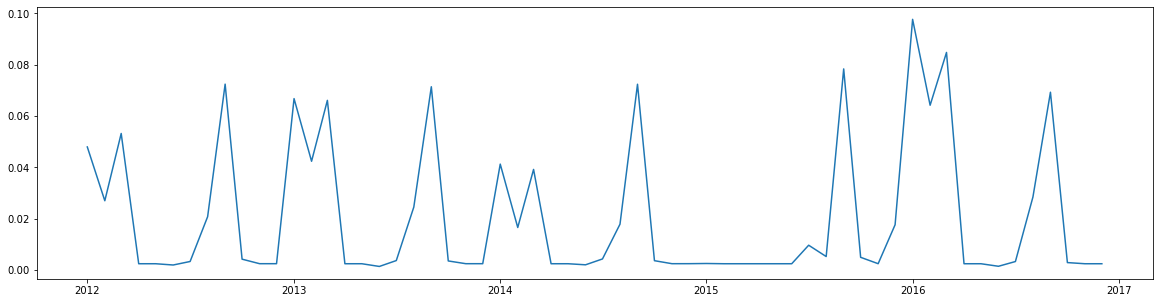

In [41]:
df = df.set_index("bulan")
plt.figure(figsize=(20, 5))
plt.plot(df.index,df)

In [42]:
dict = {'bulan': add_dates, 'data prediksi':Pred_rata, 'data asli':df_asli_rata}
df = pd.DataFrame(dict)
df


,bulan,data prediksi,data asli
0,2012-01-01,0.002449,5.036144e-02
1,2012-02-01,0.002449,2.939421e-02
2,2012-03-01,0.002449,5.561152e-02
3,2012-04-01,0.002448,0.000000e+00
4,2012-05-01,0.002449,0.000000e+00
5,2012-06-01,0.002449,4.985998e-04
6,2012-07-01,0.002449,4.732139e-03
7,2012-08-01,0.002449,2.313566e-02
8,2012-09-01,0.002449,7.482821e-02
9,2012-10-01,0.002466,1.951756e-03


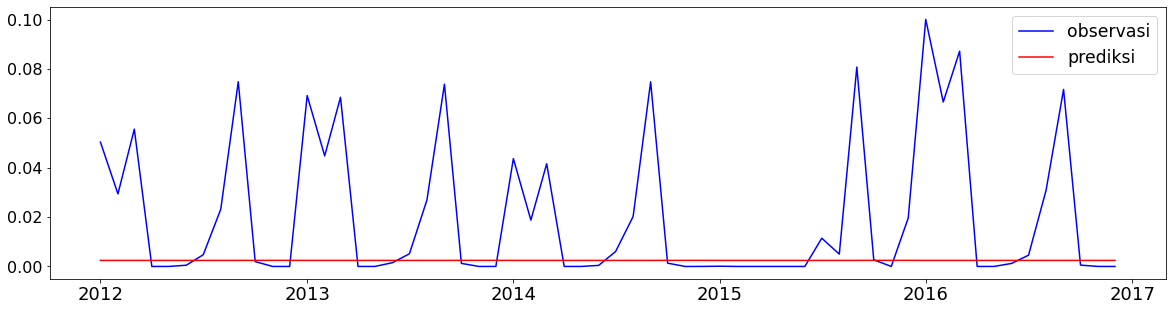

In [43]:
# df_asli = data_4
df = df.set_index("bulan")
plt.figure(figsize=(20, 5))
plt.plot(df.index, df_asli_rata[-60:], color='b', label="observasi")
plt.plot(df.index, Pred_rata[-60:], color='r', label="prediksi")
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

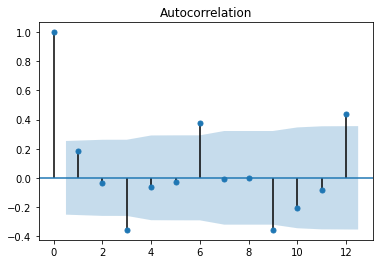

In [44]:
# # Time series data

# data = mae

 

# # Plot autocorrelation

# plt.acorr(data, maxlags=12)

 

# # Add labels to autocorrelation plot

# plt.title('Autocorrelation of LSTM')

# plt.xlabel('Lag')

# plt.ylabel('Autocorrelation')

 

# # Display the autocorrelation plot

# plt.show()

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(mae, lags=12 , alpha=0.05)
acf.show()

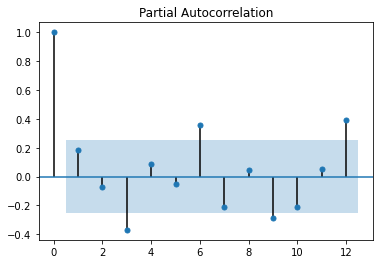

In [45]:
pacf = smt.graphics.plot_pacf(mae, lags=12 , alpha=0.05)
pacf.show()

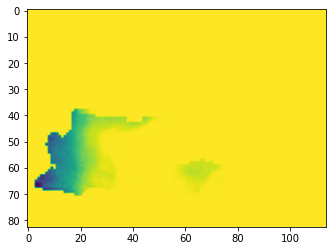

In [46]:
plt.imshow((df_asli[59]-pred_list[59]).reshape(83,114))

In [47]:
from skimage import io
# io.imsave('NewRaster/201201.tif', pred_list[0].reshape(83,114))

In [48]:
pred_list[pred_list==0]=-9999

In [112]:
no=0
for pred in pred_list:
    if(add_dates[no].month<10):
        nama_file = 'Raster_1/'+str(add_dates[no].year)+'0'+str(add_dates[no].month)+'.tif'
    else:
        nama_file = 'Raster_1/'+str(add_dates[no].year)+str(add_dates[no].month)+'.tif'
            
    io.imsave(nama_file, pred_list[no].reshape(83,114))
    no+=1
nama_file

'Raster_1/201612.tif'

In [113]:
model.save('LSTM102030DENSE405060_adam_seed1.h5')